In [0]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df = pd.read_csv('drive/My Drive/Fall APM Project/totalwithmaininfo.csv',sep=',')
df = df.drop(df.columns[0],axis=1)

In [0]:
#y = df['Y'].values
#X = df.drop(['Y'], axis = 1)
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state=30)

In [0]:
train_percentage = 17/22
train_index = int(len(df)*train_percentage)
test_index = len(df)-train_index

In [0]:
df_train = df[:train_index]
df_test = df[-test_index:]

In [0]:
X_test = df_test.drop(["Y"],axis=1)
y_test = df_test["Y"]

In [0]:
X_train = df_train.drop('Y',axis=1)
y_train = df_train['Y']

In [0]:
def average(y_pred):
  for i in range(len(y_pred)):
    if i % 240 == 0 or (i+1) % 240 == 0:
      pass
    else: 
      average = float(y_pred[i-1] +  y_pred[i] + y_pred[i+1])/3
      if average >= 0.5:
        y_pred[i] = 1
      else:
        y_pred[i] = 0
  return y_pred

## 1. Logistic Regression

In [0]:
clf = LogisticRegression().fit(X_train, y_train)
y_pred_1 = clf.predict(X_test)
y_pred_1 = average(y_pred_1)
y_score_1 = clf.predict_proba(X_test)[:,1]
acc1 = accuracy_score(y_test, y_pred_1)
f1_score_1 = metrics.f1_score(y_test, y_pred_1)
roc_1 = metrics.roc_auc_score(y_test, y_score_1)
print([acc1,f1_score_1,roc_1])
print(confusion_matrix(y_test, y_pred_1))

[0.6433333333333333, 0.46433041301627026, 0.7029777777777777]
[[1173   27]
 [ 829  371]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## 2. Naive Bayes

In [0]:
clf_NB = GaussianNB()
clf_NB.fit(X_train, y_train)
pred_NB = clf_NB.predict(X_test)
pred_NB = average(pred_NB)
y_score_2 = clf_NB.predict_proba(X_test)[:,1]
acc2 = accuracy_score(y_test, pred_NB)
f1_score_2 = metrics.f1_score(y_test, pred_NB)
roc_2 = metrics.roc_auc_score(y_test, y_score_2)
print([acc2,f1_score_2,roc_2])
print(confusion_matrix(y_test, pred_NB))

[0.5775, 0.2838983050847458, 0.7339368055555555]
[[1185   15]
 [ 999  201]]


## 3. KNN

In [0]:
acc3_list = []
f1_score3_list = []
roc_3_list = []
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,30):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train) 
    pred_KN = neigh.predict(X_test)
    pred_KN = average(pred_KN)
    y_score_3 = neigh.predict_proba(X_test)[:,1]
    acc3_list.append(accuracy_score(y_test, pred_KN))
    f1_score3_list.append(metrics.f1_score(y_test, pred_KN))
    roc_3_list.append(metrics.roc_auc_score(y_test, y_score_3))

In [0]:
acc3_list.index(max(acc3_list))+1

25

In [0]:
neigh = KNeighborsClassifier(n_neighbors=acc3_list.index(max(acc3_list))+1)
neigh.fit(X_train, y_train) 
pred_KN = neigh.predict(X_test)
pred_KN = average(pred_KN)
y_score_3 = neigh.predict_proba(X_test)[:,1]
acc3 = accuracy_score(y_test, pred_KN)
f1_score_3 = metrics.f1_score(y_test, pred_KN)
roc_3 = metrics.roc_auc_score(y_test, y_score_3)
print([acc3,f1_score_3,roc_3])
print(confusion_matrix(y_test, pred_KN))

[0.7720833333333333, 0.7554760840411264, 0.7828010416666668]
[[1008  192]
 [ 355  845]]


## 4. MLP

In [0]:
from sklearn.neural_network import MLPClassifier

F1_score_4_list = []
acc4_list = []
roc_4_list = []
mlp = []

hidden_units = [10,20,30,40,50,60,70]
optimizer = ['sgd','adam','lbfgs']
activation = ['logistic','tanh','relu']
for j in activation:
    for i in optimizer:
        for k in hidden_units:
              clf_MLP = MLPClassifier(hidden_layer_sizes= k, activation =  j, solver= i)
              clf_MLP.fit(X_train, y_train)
              pred_MLP = clf_MLP.predict(X_test)
              pred_MLP = average(pred_MLP)
              y_score_4 = clf_MLP.predict_proba(X_test)[:,1]
              acc4_list.append(accuracy_score(y_test,pred_MLP))
              roc_4_list.append(metrics.roc_auc_score(y_test, y_score_4))
              F1_score_4_list.append(metrics.f1_score(y_test, pred_MLP))
              mlp.append([j,i,k])

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multila

In [0]:
print("Best Accuracy: ", max(acc4_list))
min_index = acc4_list.index(max(acc4_list))
print("Best Combination:", mlp[min_index])

Best Accuracy:  0.7633333333333333
Best Combination: ['logistic', 'sgd', 30]


In [0]:
clf_MLP = MLPClassifier(hidden_layer_sizes= mlp[min_index][2], activation =  mlp[min_index][0], solver= mlp[min_index][1])
clf_MLP.fit(X_train, y_train)
pred_MLP = clf_MLP.predict(X_test)
pred_MLP = average(pred_MLP)
y_score_4 = clf_MLP.predict_proba(X_test)[:,1]
acc4 = accuracy_score(y_test,pred_MLP)
f1_score_4 = metrics.f1_score(y_test, pred_MLP)
roc_4 = metrics.roc_auc_score(y_test, y_score_4)
print([acc4,f1_score_4,roc_4])
print(confusion_matrix(y_test, pred_MLP))

[0.7558333333333334, 0.7566445182724252, 0.7667625]
[[903 297]
 [289 911]]


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## 5. Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier
acc5=[]
max_depth = []
for i in [2,3,4,5,6,7,8,9,10]:
    clf_DT = DecisionTreeClassifier(random_state=0, max_depth = i)
    clf_DT.fit(X_train, y_train)
    pred_DT = clf_DT.predict(X_test)
    pred_DT = average(pred_DT)
    acc5.append(accuracy_score(pred_DT, y_test))
    max_depth.append(i)
print (max(acc5))

0.7504166666666666


In [0]:
 best_depth = max_depth[acc5.index(max(acc5))]

In [0]:
 best_depth

6

In [0]:
clf_DT = DecisionTreeClassifier(random_state=0, max_depth = best_depth)
clf_DT.fit(X_train, y_train)
pred_DT = clf_DT.predict(X_test)
pred_DT = average(pred_DT)
y_score_5 = clf_DT.predict_proba(X_test)[:,1]
acc5 = accuracy_score(y_test, pred_DT)
f1_score_5 = metrics.f1_score(y_test, pred_DT)
roc_5 = metrics.roc_auc_score(y_test, y_score_5)
print([acc5,f1_score_5,roc_5])
print(confusion_matrix(y_test, pred_DT))

[0.7504166666666666, 0.7410289667099005, 0.7611229166666666]
[[944 256]
 [343 857]]


## 6. Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier
acc6=[]
max_depth = []
for i in range(1,10):
    clf_RF = RandomForestClassifier(max_depth=i)
    clf_RF.fit(X_train, y_train) 
    pred_RF = clf_RF.predict(X_test)
    pred_RF = average(pred_RF)
    acc6.append(accuracy_score(pred_RF, y_test))
    max_depth.append(i)
print (max(acc6))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

0.75


In [0]:
best_depth_6 = max_depth[acc6.index(max(acc6))]

In [0]:
best_depth_6

8

In [0]:
clf_RF = RandomForestClassifier(max_depth=best_depth_6)
clf_RF.fit(X_train, y_train) 
pred_RF = clf_RF.predict(X_test)
pred_RF = average(pred_RF)
y_score_6 = clf_RF.predict_proba(X_test)[:,1]
acc6 = accuracy_score(y_test, pred_RF)
f1_score_6 = metrics.f1_score(y_test, pred_RF)
roc_6 = metrics.roc_auc_score(y_test, y_score_6)
print([acc6,f1_score_6,roc_6])
print(confusion_matrix(y_test, pred_RF))

feature_importances = pd.DataFrame(clf_RF.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

[0.705, 0.6105610561056105, 0.7773371527777777]
[[1137   63]
 [ 645  555]]


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from numpy import loadtxt
from xgboost import XGBClassifier

clf_XGB = XGBClassifier()
clf_XGB.fit(X_train, y_train)
pred_XGB = clf_XGB.predict(X_test)
pred_XGB = average(pred_XGB)
y_score_8 = clf_XGB.predict_proba(X_test)[:,1]
acc8 = accuracy_score(y_test,pred_XGB)
f1_score_8 = metrics.f1_score(y_test, pred_XGB)
roc_8 = metrics.roc_auc_score(y_test, y_score_8)
print([acc8,f1_score_8,roc_8])
print(confusion_matrix(y_test, pred_XGB))

[0.74375, 0.6876587100050787, 0.7872850694444444]
[[1108   92]
 [ 523  677]]


In [0]:
feature_importances

,importance
MAR_N,0.167546
MOE_N,0.148529
MAR,0.140682
EAR_N,0.131376
EAR,0.125618
Circularity_N,0.106515
Circularity,0.103410
MOE,0.076324


In [0]:
X_train_shaped = np.expand_dims(X_train, axis=2)

In [9]:
X_train_shaped.shape

(8160, 8, 1)

In [0]:
X_test_shaped = np.expand_dims(X_test, axis=2)

In [15]:
X_test_shaped.shape

(2400, 8, 1)

In [26]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv1D
from keras.optimizers import Adam, RMSprop
from keras.layers import Dropout
## Create Model ##

model = Sequential()

model.add(Conv1D(64, kernel_size = 3, activation = 'relu', input_shape = (8,1)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation = 'sigmoid'))


## Compile Model ##
optimizer = Adam(lr=0.00001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

## Train Model and Check Validation Accuracy ##
model.fit(X_train_shaped, y_train, validation_data = (X_test_shaped,y_test), epochs = 100)

Train on 8160 samples, validate on 2400 samples
Epoch 1/100
8160/8160 [==============================] - 1s 174us/step - loss: 0.7052 - acc: 0.5146 - val_loss: 0.6657 - val_acc: 0.5729
Epoch 2/100
8160/8160 [==============================] - 1s 63us/step - loss: 0.6787 - acc: 0.5919 - val_loss: 0.6625 - val_acc: 0.6863
Epoch 3/100
8160/8160 [==============================] - 0s 61us/step - loss: 0.6666 - acc: 0.6376 - val_loss: 0.6592 - val_acc: 0.6963
Epoch 4/100
8160/8160 [==============================] - 1s 63us/step - loss: 0.6591 - acc: 0.6520 - val_loss: 0.6556 - val_acc: 0.7013
Epoch 5/100
8160/8160 [==============================] - 1s 62us/step - loss: 0.6515 - acc: 0.6643 - val_loss: 0.6524 - val_acc: 0.7067
Epoch 6/100
8160/8160 [==============================] - 1s 64us/step - loss: 0.6460 - acc: 0.6756 - val_loss: 0.6498 - val_acc: 0.7058
Epoch 7/100
8160/8160 [==============================] - 1s 65us/step - loss: 0.6381 - acc: 0.6896 - val_loss: 0.6463 - val_acc: 0.7079

In [27]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 6, 64)             256       
_________________________________________________________________
flatten_8 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 32)                12320     
_________________________________________________________________
dense_23 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_4 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 17        
Total params: 13,121
Trainable params: 13,121
Non-trainable params: 0
__________________________________________________

In [28]:
pred_cnn = model.predict_classes(X_test_shaped)
pred_cnn = average(pred_cnn)
y_score_7 = model.predict_proba(X_test_shaped)
acc7 = accuracy_score(y_test, np.array(pred_cnn))
f1_score_7 = metrics.f1_score(y_test, pred_cnn)
roc_7 = metrics.roc_auc_score(y_test, y_score_7)
print([acc7,f1_score_7,roc_7])
print(confusion_matrix(y_test, pred_cnn))

[0.7104166666666667, 0.7026101839965768, 0.7778354166666667]
[[884 316]
 [379 821]]


,Accuracy
Model,
Logistic Regression,0.643333
Naive Bayes,0.577500
KNN,0.772083
MLP,0.755833
Decision Tree,0.750417
Random Forest,0.705000
CNN,0.710833
XGB Boosting,0.743750


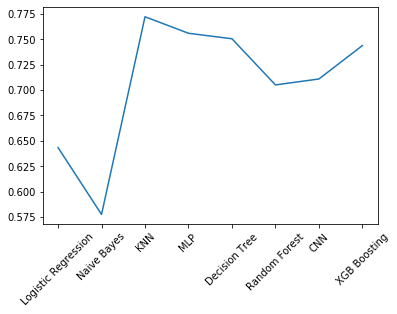

In [0]:
acc_total = {'Model':['Logistic Regression','Naive Bayes', 'KNN', 'MLP','Decision Tree','Random Forest', 'CNN', 'XGB Boosting'],
        'Accuracy':[acc1,acc2, acc3, acc4, acc5,acc6,acc7, acc8]}
acc_total=pd.DataFrame(acc_total)
acc_total=acc_total.set_index('Model')
acc_total
plt.plot(acc_total['Accuracy'])
plt.xticks(rotation=45)
acc_total

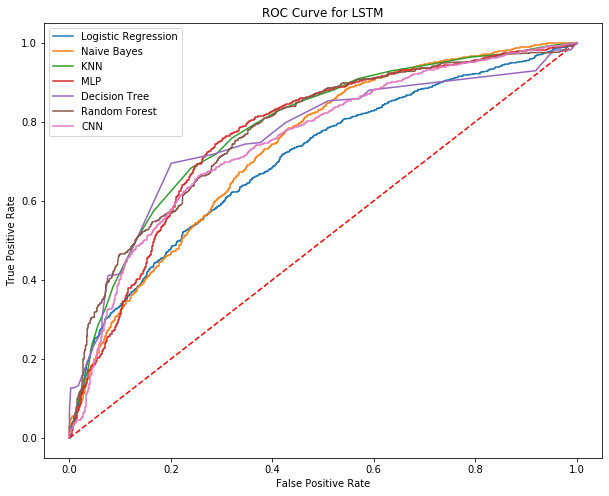

In [0]:
plt.figure(figsize=(10,8))
plt.plot([0, 1], [0, 1],'r--')
fpr_1, tpr_1, thresholds = roc_curve(y_test, y_score_1)
fpr_2, tpr_2, thresholds = roc_curve(y_test, y_score_2)
fpr_3, tpr_3, thresholds = roc_curve(y_test, y_score_3)
fpr_4, tpr_4, thresholds = roc_curve(y_test, y_score_4)
fpr_5, tpr_5, thresholds = roc_curve(y_test, y_score_5)
fpr_6, tpr_6, thresholds = roc_curve(y_test, y_score_6)
fpr_7, tpr_7, thresholds = roc_curve(y_test, y_score_7)
plt.plot(fpr_1, tpr_1, label= "Logistic Regression")
plt.plot(fpr_2, tpr_2, label= "Naive Bayes")
plt.plot(fpr_3, tpr_3, label= "KNN")
plt.plot(fpr_4, tpr_4, label= "MLP")
plt.plot(fpr_5, tpr_5, label= "Decision Tree")
plt.plot(fpr_6, tpr_6, label= "Random Forest")
plt.plot(fpr_7, tpr_7, label= "CNN")
plt.title('ROC Curve for LSTM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

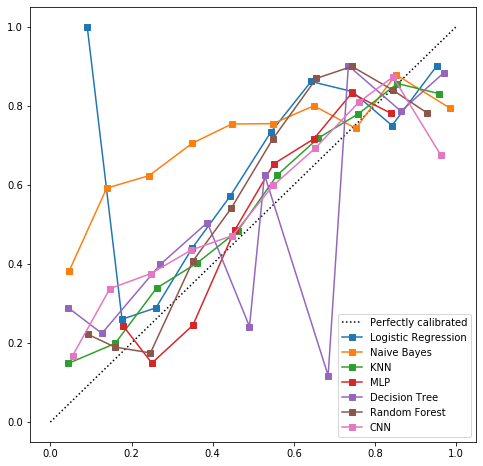

In [0]:
from sklearn.calibration import calibration_curve
plt.figure(figsize=(8,8))
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
fraction_of_positives, mean_predicted_value=calibration_curve(y_test,y_score_1,n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives,"s-",
                 label="%s" % 'Logistic Regression')
fraction_of_positives, mean_predicted_value=calibration_curve(y_test,y_score_2,n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives,"s-",
                 label="%s" % 'Naive Bayes')
fraction_of_positives, mean_predicted_value=calibration_curve(y_test,y_score_3,n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives,"s-",
                 label="%s" % 'KNN')
fraction_of_positives, mean_predicted_value=calibration_curve(y_test,y_score_4,n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives,"s-",
                 label="%s" % 'MLP')
fraction_of_positives, mean_predicted_value=calibration_curve(y_test,y_score_5,n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives,"s-",
                 label="%s" % 'Decision Tree')
fraction_of_positives, mean_predicted_value=calibration_curve(y_test,y_score_6,n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives,"s-",
                 label="%s" % 'Random Forest')
fraction_of_positives, mean_predicted_value=calibration_curve(y_test,y_score_7,n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives,"s-",
                 label="%s" % 'CNN')
plt.legend(loc="lower right")